One of the advantages of Keras is that it can import this dataset for you without needing to explicitly download it from the web (it will download it for you). We'll normalize the images and we'll convert the target data to one-hot encoding: 

In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, Y_train), (X_validation, Y_validation) = mnist.load_data()

X_train = X_train.reshape(60000, 784) / 255
X_validation = X_validation.reshape(10000, 784) / 255

classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)
Y_validation = np_utils.to_categorical(Y_validation, classes)

11490434/11490434 [==============================] - 0s 0us/step


Next, we'll define the network:

In [2]:
from keras.layers import BatchNormalization
from keras.layers.core import Dense, Activation
from keras.models import Sequential

input_size = 784
hidden_units = 100

model = Sequential([
    Dense(hidden_units, input_dim=input_size),
    BatchNormalization(),
    Activation('relu'),
    Dense(classes),
    Activation('softmax')
])

Then, we'll run the training for 20 epochs:

In [3]:
model.compile(
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    optimizer='adam')

model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          verbose=1)

Epoch 1/20
600/600 [==============================] - 6s 7ms/step - loss: 0.3133 - accuracy: 0.9146
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1425 - accuracy: 0.9603
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.1026 - accuracy: 0.9714
Epoch 4/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0776 - accuracy: 0.9784
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0620 - accuracy: 0.9822
Epoch 6/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0517 - accuracy: 0.9853
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.0430 - accuracy: 0.9877
Epoch 8/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0354 - accuracy: 0.9907
Epoch 9/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0304 - accuracy: 0.9919
Epoch 10/20
600/600 [==============================] - 3s 4ms/step - loss: 0.0261 - accuracy: 0.9933

Finally, we'll evaluate the network:

In [4]:
score = model.evaluate(X_validation, Y_validation, verbose=1)
print('Validation accuracy:', score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.0820 - accuracy: 0.9778
Validation accuracy: 0.9778000116348267


We'll visualize the weights of the hidden layer:

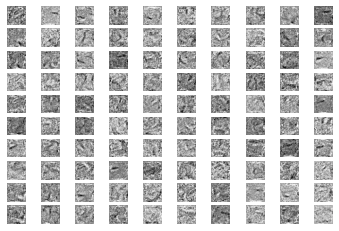

In [5]:
weights = model.layers[0].get_weights()

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy

fig = plt.figure()

w = weights[0].T
for unit in range(hidden_units):
    ax = fig.add_subplot(10, 10, unit + 1)
    ax.axis("off")
    ax.imshow(numpy.reshape(w[unit], (28, 28)), cmap=cm.Greys_r)

plt.show()